# Introduction

Le filtrage collaboratif basé sur l'utilisateur est également appelé filtrage collaboratif utilisateur-utilisateur. Il s'agit d'un type d'algorithme de recommandation de filtrage collaboratif basé sur l'utilisateur

Ici, nous parlerons de

Qu'est-ce que le filtrage collaboratif basé sur l'utilisateur (utilisateur-utilisateur)?

Comment créer une matrice utilisateur-produit ?
Comment traiter les données pour un filtrage collaboratif basé sur les utilisateurs?

Comment identifier les utilisateurs similaires ?

# Fonctionnement


Tout d’abord, comprenons comment fonctionne le filtrage collaboratif basé sur l’utilisateur.

Le filtrage collaboratif basé sur l'utilisateur émet des recommandations basées sur les interactions utilisateur-produit passées. L’hypothèse derrière l’algorithme est que des utilisateurs similaires aiment les produits similaires.

L'algorithme de filtrage collaboratif basé sur l'utilisateur comporte généralement les étapes suivantes :

- Trouvez des utilisateurs similaires en fonction des interactions avec des éléments courants.

- Identifiez les éléments bien notés par des utilisateurs similaires mais qui n'ont pas été exposés à l'utilisateur actif qui vous intéresse.

- Calculez le score moyen pondéré pour chaque élément.
Classez les éléments en fonction de leur score et choisissez les n meilleurs éléments à recommander.

# import des librairies

In [8]:
import pandas as pd


import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# import des données

In [9]:

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [10]:
review = pd.read_csv('/content/gdrive/MyDrive/scrap/reviews_data.csv')
attract = pd.read_csv('/content/gdrive/MyDrive/scrap/attractions.csv')

In [11]:
attract = attract[0:104]

In [5]:
type(attract['address'][0])

str

In [22]:
attract['address'][7]

"{'lat': 40.71304703, 'lng': -74.00723267}"

In [9]:
attract['address'][0].split(': ')

["{'lat'", "40.71304703, 'lng'", '-74.00723267}']

In [17]:
def lat(r):
  r = r.split(': ')
  t = r[1].split(', ')[0]
  e = r[2].split('}')[0]

  return float(t)


In [18]:
def lng(r):
  r = r.split(': ')
  t = r[1].split(', ')[0]
  e = r[2].split('}')[0]

  return float(e)

In [12]:
def lat(r):
    r = r.split(': ')
    if len(r) >= 2:  # Vérifier si la liste contient au moins deux éléments
        t = r[1].split(', ')[0]
        return float(t)
    else:
        return None  # Retourner une valeur par défaut si la liste ne contient pas suffisamment d'éléments

def lng(r):
    r = r.split(': ')
    if len(r) >= 3:  # Vérifier si la liste contient au moins trois éléments
        e = r[2].split('}')[0]
        return float(e)
    else:
        return None  # Retourner une valeur par défaut si la liste ne contient pas suffisamment d'éléments


In [13]:
lat(attract['address'][0])

40.71304703

In [14]:
lng(attract['address'][0])

-74.00723267

In [15]:
attract['lat'] = attract['address'].apply(lat)
attract['lng'] = attract['address'].apply(lng)

In [27]:
attract

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price,lat,lng
0,0,0,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.00,40.713047,-74.007233
1,1,1,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,2. The National 9/11 Memorial & Museum,96883,"{'lat': 40.71304703, 'lng': -74.00723267}",Speciality Museums • Historic Sites,4.5,33.00,40.713047,-74.007233
2,2,2,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,3. The Metropolitan Museum of Art,55184,"{'lat': 40.78384018, 'lng': -73.96555328}",Points of Interest & Landmarks • Art Museums,5.0,126.14,40.783840,-73.965553
3,3,3,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,4. Empire State Building,94920,"{'lat': 40.74880981, 'lng': -73.98639679}",Points of Interest & Landmarks • Architectural...,4.5,48.00,40.748810,-73.986397
4,4,4,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,5. The High Line,62997,"{'lat': 40.72782516, 'lng': -73.99477386}",Parks • Scenic Walking Areas,4.5,88.00,40.727825,-73.994774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,99,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,100. Park Avenue,442,"{'lat': 40.77041245, 'lng': -73.96220398}",Neighborhoods • Historic Walking Areas,4.5,75.00,40.770412,-73.962204
100,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.00,40.775249,-73.947624
101,101,101,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,102. The Lion King,9270,"{'lat': 40.75992584, 'lng': -73.98041534}",Theater & Performances,5.0,150.00,40.759926,-73.980415
102,102,102,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,103. Minskoff Theatre,284,"{'lat': 40.71304703, 'lng': -74.00723267}",Theaters,4.5,150.00,40.713047,-74.007233


In [1]:
import geocoder

In [2]:
def get_address(attraction_name, city_name, country_name):

    attraction_name = attraction_name if attraction_name is not None else ''
    city_name = city_name if city_name is not None else ''
    country_name = country_name if country_name is not None else ''

    # Concaténer les variables
    attraction = attraction_name + city_name + country_name

    g = geocoder.bing(attraction, key='AgR8OLOeZgfCcu_KUf1R8Dfb4JrD0_X2UWIjPYum-aQa9vP9U_s42HjbiZVOYbTI')
    location = g.json



    if location == None:
        return "No Address Found"
    data = {'lat':location['lat'], 'lng':location['lng']}
    #printing latitude and longitude
    #print("Latitude = ", location.latitude, "\n")
    #print("Longitude = ", location.longitude)
    return data

In [25]:
float(get_address("104. Union Square Green Market", "New York City", "United States")['lat'])

42.16029116

In [28]:
float(get_address("7. Top of the Rock", "New York City", "United States")['lng'])

-73.728746

In [32]:
for index, row in attract_modified.iterrows():
  if(row['address'] == 'No Address Found'):
    print(row['attraction_id'], row['category'])

In [30]:
attract_modified = attract.copy()

In [ ]:
attract_modified.at[index, 'votre_colonne'] = "Nouvelle valeur"

In [31]:
for index, row in attract.iterrows():
  if(row['address'] == 'No Address Found'):
    attract_modified.at[index, 'lat'] = float(get_address(row['category'], "New York City", "United States")['lat'])
    attract_modified.at[index, 'lng'] = float(get_address(row['category'], "New York City", "United States")['lng'])
    attract_modified.at[index, 'address'] = get_address(row['category'], "New York City", "United States")


In [ ]:
attract.to_csv('attract0.csv')

In [36]:
def split(item):
    try:
        image_list = eval(item)
        for link in image_list:
            if link.startswith('http'):
                return link
    except Exception as e:
        print(f"Erreur lors de l'extraction du lien : {e}")
    return None

In [33]:
type(attract_modified['image'][0])

str

In [34]:
attract_modified['image'][0]

"['https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1c/90/ab/88/central-park-manhattan.jpg?w=500&h=400&s=1', 'data:image/svg+xml;utf8,%3C%3Fxml%20version%3D%221.0%22%20%3F%3E%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20preserveAspectRatio%3D%22none%22%20viewBox%3D%220%200%20156%20156%22%3E%3Cpath%20fill%3D%22%23FAF1ED%22%20d%3D%22M0%200h156v156H0z%22%20%2F%3E%3Cpath%20fill%3D%22%23F2B203%22%20d%3D%22M129.486%20156H156V0h-53.961c1.982%2011.358%206.663%2021.346%2013.702%2027.5l.757.662c14.837%2012.97%2019.241%2042.948%209.84%2066.953l-.479%201.223c-7.923%2020.231-6.041%2044.702%203.627%2059.662z%22%2F%3E%3Cpath%20fill%3D%22%23FFCCCC%22%20d%3D%22M40.734%20156H0V76.867C21.271%2090.92%2036.97%20120.477%2040.734%20156z%22%20%2F%3E%3C%2Fsvg%3E', 'data:image/svg+xml;utf8,%3C%3Fxml%20version%3D%221.0%22%20%3F%3E%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20preserveAspectRatio%3D%22none%22%20viewBox%3D%220%200%20156%20156%22%3E%3Cpath%20fill%3D%22%23FAF1ED

In [33]:
split(attract['image'][0])

'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1c/90/ab/88/central-park-manhattan.jpg?w=500&h=400&s=1'

In [37]:
attract_modified['image'] = attract_modified['image'].apply(split)

In [38]:
attract_modified

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price,lat,lng
0,0,0,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.00,40.713047,-74.007233
1,1,1,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,2. The National 9/11 Memorial & Museum,96883,"{'lat': 40.71304703, 'lng': -74.00723267}",Speciality Museums • Historic Sites,4.5,33.00,40.713047,-74.007233
2,2,2,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,3. The Metropolitan Museum of Art,55184,"{'lat': 40.78384018, 'lng': -73.96555328}",Points of Interest & Landmarks • Art Museums,5.0,126.14,40.783840,-73.965553
3,3,3,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,4. Empire State Building,94920,"{'lat': 40.74880981, 'lng': -73.98639679}",Points of Interest & Landmarks • Architectural...,4.5,48.00,40.748810,-73.986397
4,4,4,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,5. The High Line,62997,"{'lat': 40.72782516, 'lng': -73.99477386}",Parks • Scenic Walking Areas,4.5,88.00,40.727825,-73.994774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,99,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,100. Park Avenue,442,"{'lat': 40.77041245, 'lng': -73.96220398}",Neighborhoods • Historic Walking Areas,4.5,75.00,40.770412,-73.962204
100,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.00,40.775249,-73.947624
101,101,101,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,102. The Lion King,9270,"{'lat': 40.75992584, 'lng': -73.98041534}",Theater & Performances,5.0,150.00,40.759926,-73.980415
102,102,102,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,103. Minskoff Theatre,284,"{'lat': 40.71304703, 'lng': -74.00723267}",Theaters,4.5,150.00,40.713047,-74.007233


In [39]:
attract_modified.to_csv('attract.csv')

In [36]:
attract

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price,lat,lng
0,0,0,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.00,40.713047,-74.007233
1,1,1,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,2. The National 9/11 Memorial & Museum,96883,"{'lat': 40.71304703, 'lng': -74.00723267}",Speciality Museums • Historic Sites,4.5,33.00,40.713047,-74.007233
2,2,2,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,3. The Metropolitan Museum of Art,55184,"{'lat': 40.78384018, 'lng': -73.96555328}",Points of Interest & Landmarks • Art Museums,5.0,126.14,40.783840,-73.965553
3,3,3,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,4. Empire State Building,94920,"{'lat': 40.74880981, 'lng': -73.98639679}",Points of Interest & Landmarks • Architectural...,4.5,48.00,40.748810,-73.986397
4,4,4,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,5. The High Line,62997,"{'lat': 40.72782516, 'lng': -73.99477386}",Parks • Scenic Walking Areas,4.5,88.00,40.727825,-73.994774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,99,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,100. Park Avenue,442,"{'lat': 40.77041245, 'lng': -73.96220398}",Neighborhoods • Historic Walking Areas,4.5,75.00,40.770412,-73.962204
100,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.00,40.775249,-73.947624
101,101,101,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,102. The Lion King,9270,"{'lat': 40.75992584, 'lng': -73.98041534}",Theater & Performances,5.0,150.00,40.759926,-73.980415
102,102,102,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,https://dynamic-media-cdn.tripadvisor.com/medi...,103. Minskoff Theatre,284,"{'lat': 40.71304703, 'lng': -74.00723267}",Theaters,4.5,150.00,40.713047,-74.007233


In [5]:
review.head(5)

,Unnamed: 0,image_user,user,info_user,type_review,review_date,review,rating,attraction_id,user_id
0,0,https://dynamic-media-cdn.tripadvisor.com/medi...,bucketlisttravel,"Saint Paul, MN11 contributions",So lively!!,"January 6, 2024",Lively people. Happy kids. Beautiful skyline. ...,5.0,0,0
1,1,https://dynamic-media-cdn.tripadvisor.com/medi...,WPLandry,"Fairfax, VA545 contributions",Beautiful & spacious,"January 6, 2024",Central Park is an amazing escape from the bus...,5.0,0,1
2,2,https://dynamic-media-cdn.tripadvisor.com/medi...,Rumzzz,"Irving, TX77 contributions",Spectacular,"January 6, 2024",One can never get enough of Central Park - the...,5.0,0,2
3,3,https://dynamic-media-cdn.tripadvisor.com/medi...,A Ruiz,"Lahaina, HI56 contributions",Awesome experience!,"December 30, 2023",Carriage ride around the park with historical ...,5.0,0,3
4,4,https://dynamic-media-cdn.tripadvisor.com/medi...,BeakerTX,"San Antonio, TX572 contributions",It's a park!,"December 28, 2023",Nice family stroll through the southern part o...,5.0,0,4


In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13027 entries, 0 to 13026
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13027 non-null  int64  
 1   image_user     11840 non-null  object 
 2   user           13027 non-null  object 
 3   info_user      13027 non-null  object 
 4   type_review    13027 non-null  object 
 5   review_date    13027 non-null  object 
 6   review         13027 non-null  object 
 7   rating         13027 non-null  float64
 8   attraction_id  13027 non-null  int64  
 9   user_id        13027 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1017.9+ KB


In [7]:
review.shape

(13027, 10)

In [8]:
review.corr()

<ipython-input-8-b9a744f077e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  review.corr()


,Unnamed: 0,rating,attraction_id,user_id
Unnamed: 0,1.000000,-0.011711,0.999826,0.801745
rating,-0.011711,1.000000,-0.012271,-0.006035
attraction_id,0.999826,-0.012271,1.000000,0.799946
user_id,0.801745,-0.006035,0.799946,1.000000


In [5]:
review[['rating', 'attraction_id']].groupby(['rating'], as_index=False).mean().sort_values(by='rating', ascending=False)

,rating,attraction_id
4,5.0,49.906506
3,4.0,56.383489
2,3.0,56.621780
1,2.0,45.101351
0,1.0,41.321101


In [6]:
review.isnull().sum()

Unnamed: 0          0
image_user       1187
user                0
info_user           0
type_review         0
review_date         0
review              0
rating              0
attraction_id       0
user_id             0
dtype: int64

In [10]:
review.nunique()

Unnamed: 0       13027
image_user        3725
user              9048
info_user         7874
type_review      11248
review_date       3035
review           12721
rating               5
attraction_id      104
user_id           9048
dtype: int64

In [11]:
attract.corr()

<ipython-input-11-650751f6349c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attract.corr()


,Unnamed: 0,attraction_id,nbre_review,rating,price
Unnamed: 0,1.000000,1.000000,-0.617882,-0.196571,0.104263
attraction_id,1.000000,1.000000,-0.617882,-0.196571,0.104263
nbre_review,-0.617882,-0.617882,1.000000,0.112463,-0.054549
rating,-0.196571,-0.196571,0.112463,1.000000,0.016872
price,0.104263,0.104263,-0.054549,0.016872,1.000000


In [7]:
attract.head(5)

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price
0,0,0,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.00
1,1,1,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,2. The National 9/11 Memorial & Museum,96883,"{'lat': 40.71304703, 'lng': -74.00723267}",Speciality Museums • Historic Sites,4.5,33.00
2,2,2,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,3. The Metropolitan Museum of Art,55184,"{'lat': 40.78384018, 'lng': -73.96555328}",Points of Interest & Landmarks • Art Museums,5.0,126.14
3,3,3,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,4. Empire State Building,94920,"{'lat': 40.74880981, 'lng': -73.98639679}",Points of Interest & Landmarks • Architectural...,4.5,48.00
4,4,4,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,5. The High Line,62997,"{'lat': 40.72782516, 'lng': -73.99477386}",Parks • Scenic Walking Areas,4.5,88.00


In [ ]:
attract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   attraction_id  104 non-null    int64  
 2   country        104 non-null    object 
 3   province       104 non-null    object 
 4   city           104 non-null    object 
 5   lien_detail    104 non-null    object 
 6   image          104 non-null    object 
 7   category       104 non-null    object 
 8   nbre_review    104 non-null    int64  
 9   address        104 non-null    object 
 10  name           104 non-null    object 
 11  rating         104 non-null    float64
 12  price          104 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 10.7+ KB


In [8]:
attract.sort_values(['rating'], ascending=False).head(3)

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price
92,92,92,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,93. Immersive Gamebox - Lower East Side,303,"{'lat': 40.71304703, 'lng': -74.00723267}",Game & Entertainment Centers,5.0,36.30
2,2,2,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,3. The Metropolitan Museum of Art,55184,"{'lat': 40.78384018, 'lng': -73.96555328}",Points of Interest & Landmarks • Art Museums,5.0,126.14
101,101,101,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,102. The Lion King,9270,"{'lat': 40.75992584, 'lng': -73.98041534}",Theater & Performances,5.0,150.00


In [ ]:
attract.sort_values(['nbre_review'], ascending=False).head(10)

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price
0,0,0,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.00
1,1,1,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,2. The National 9/11 Memorial & Museum,96883,"{'lat': 40.71304703, 'lng': -74.00723267}",Speciality Museums • Historic Sites,4.5,33.00
3,3,3,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,4. Empire State Building,94920,"{'lat': 40.74880981, 'lng': -73.98639679}",Points of Interest & Landmarks • Architectural...,4.5,48.00
6,6,6,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,7. Top of the Rock,80157,No Address Found,Lookouts • Observation Decks & Towers,4.5,43.55
4,4,4,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,5. The High Line,62997,"{'lat': 40.72782516, 'lng': -73.99477386}",Parks • Scenic Walking Areas,4.5,88.00
11,11,11,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,12. Times Square,56782,"{'lat': 40.75992584, 'lng': -73.98041534}",Neighborhoods • Points of Interest & Landmarks,4.5,99.00
2,2,2,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,3. The Metropolitan Museum of Art,55184,"{'lat': 40.78384018, 'lng': -73.96555328}",Points of Interest & Landmarks • Art Museums,5.0,126.14
9,9,9,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,10. Grand Central Terminal,44731,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Architectural...,4.5,39.00
8,8,8,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,9. Statue of Liberty,44027,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Monuments & S...,4.5,44.00
5,5,5,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,6. Broadway,31686,"{'lat': 40.75992584, 'lng': -73.98041534}",Points of Interest & Landmarks,4.5,39.00


In [ ]:
attract.shape

(150, 13)

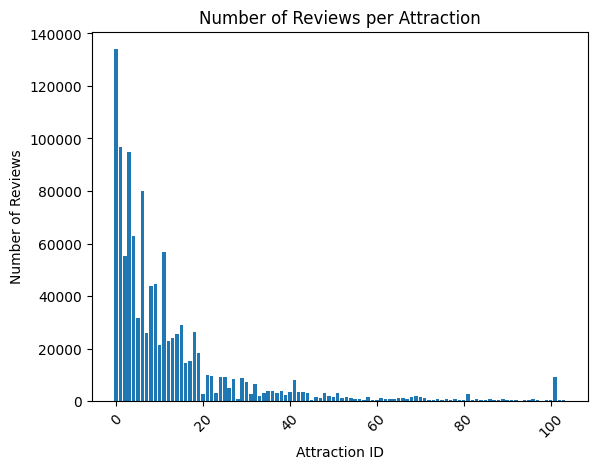

In [ ]:

plt.bar(attract["attraction_id"], attract["nbre_review"])
plt.xlabel("Attraction ID")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Attraction")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if many attractions
plt.show()

In [ ]:
attract.isnull().sum()

Unnamed: 0       0
attraction_id    0
country          0
province         0
city             0
lien_detail      0
image            0
category         0
nbre_review      0
address          0
name             0
rating           0
price            0
dtype: int64

In [ ]:
attract.nunique()

Unnamed: 0       104
attraction_id    104
country            1
province           1
city               1
lien_detail      104
image            104
category         104
nbre_review      102
address           24
name              53
rating             3
price             59
dtype: int64

In [6]:
data = review.merge(attract, on='attraction_id')

In [ ]:
data.corr()

<ipython-input-28-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0_x,rating_x,attraction_id,user_id,Unnamed: 0_y,nbre_review,rating_y,price
Unnamed: 0_x,1.000000,-0.011711,0.999826,0.801745,0.999826,-0.613969,-0.187089,0.120593
rating_x,-0.011711,1.000000,-0.012271,-0.006035,-0.012271,-0.042414,0.113075,0.018099
attraction_id,0.999826,-0.012271,1.000000,0.799946,1.000000,-0.616835,-0.187734,0.120251
user_id,0.801745,-0.006035,0.799946,1.000000,0.799946,-0.512318,-0.130804,0.108660
Unnamed: 0_y,0.999826,-0.012271,1.000000,0.799946,1.000000,-0.616835,-0.187734,0.120251
nbre_review,-0.613969,-0.042414,-0.616835,-0.512318,-0.616835,1.000000,0.119812,-0.060972
rating_y,-0.187089,0.113075,-0.187734,-0.130804,-0.187734,0.119812,1.000000,0.019109
price,0.120593,0.018099,0.120251,0.108660,0.120251,-0.060972,0.019109,1.000000


In [ ]:
data.head(2)

,Unnamed: 0_x,image_user,user,info_user,type_review,review_date,review,rating_x,attraction_id,user_id,...,province,city,lien_detail,image,category,nbre_review,address,name,rating_y,price
0,0,https://dynamic-media-cdn.tripadvisor.com/medi...,bucketlisttravel,"Saint Paul, MN11 contributions",So lively!!,"January 6, 2024",Lively people. Happy kids. Beautiful skyline. ...,5.0,0,0,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.0
1,1,https://dynamic-media-cdn.tripadvisor.com/medi...,WPLandry,"Fairfax, VA545 contributions",Beautiful & spacious,"January 6, 2024",Central Park is an amazing escape from the bus...,5.0,0,1,...,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.0


In [17]:
data[['user_id', 'attraction_id']]

,user_id,attraction_id
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
13022,9043,103
13023,9044,103
13024,9045,103
13025,9046,103


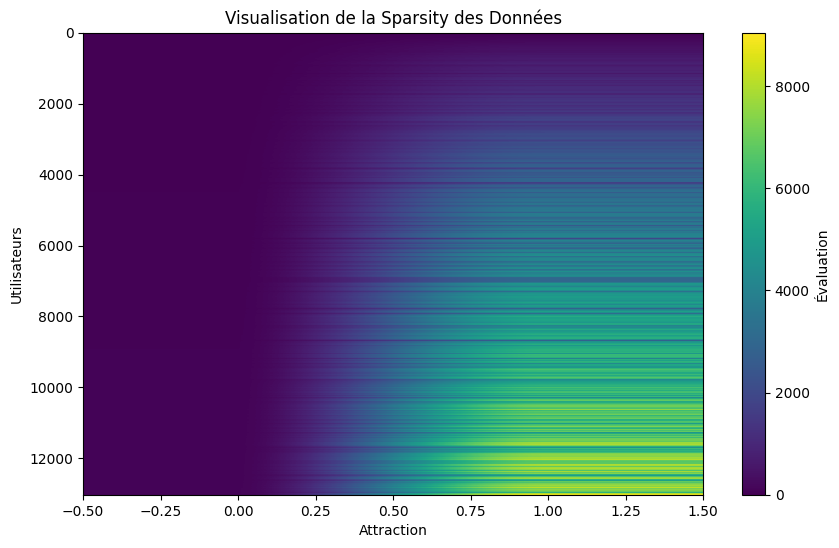

In [20]:
# Créer un graphique de chaleur pour visualiser la "sparsity" des données
plt.figure(figsize=(10, 6))
plt.imshow(data[['attraction_id', 'user_id']], cmap='viridis', aspect='auto')
plt.colorbar(label='Évaluation')
plt.title('Visualisation de la Sparsity des Données')
plt.xlabel('Attraction')
plt.ylabel('Utilisateurs')
plt.show()

In [ ]:
user_counts = data['user_id'].value_counts()
# Obtenir l'ID du user ayant le plus de notes
user_id_max_notes = user_counts.idxmax()

print("L'ID du user ayant le plus de notes :", user_id_max_notes)

L'ID du user ayant le plus de notes : 285


In [ ]:
user_counts

285     80
999     62
138     41
283     36
634     28
        ..
3639     1
3638     1
3637     1
3636     1
9047     1
Name: user_id, Length: 9048, dtype: int64

# Analyse exploiratoire des données

In [7]:
# Aggregate by attraction
agg_ratings = data.groupby('attraction_id').agg(mean_rating = ('rating_x', 'mean'),
                                                number_of_ratings = ('rating_x', 'count')).reset_index()

In [ ]:
agg_ratings


,attraction_id,mean_rating,number_of_ratings
0,0,4.709091,110
1,1,4.746154,130
2,2,4.513333,150
3,3,4.158333,120
4,4,4.650000,120
...,...,...,...
99,99,4.300000,140
100,100,4.292035,113
101,101,4.635714,140
102,102,4.420000,100


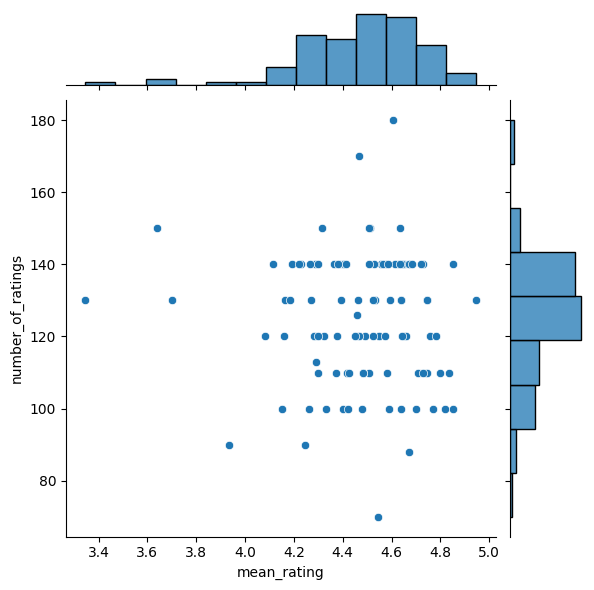

In [ ]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)

In [ ]:
print('The ratings dataset has', data['user_id'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', data['attraction_id'].nunique(), 'unique attractions')

# Number of ratings
print('The ratings dataset has', data['rating_x'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(data['rating_x'].unique()))

The ratings dataset has 9048 unique users
The ratings dataset has 104 unique movies
The ratings dataset has 5 unique ratings
The unique ratings are [1.0, 2.0, 3.0, 4.0, 5.0]


In [ ]:
data[['user_id', 'attraction_id']].duplicated().sum()  #491 personnes on noté la meme attraction plus d'une fois

491

# Data normalization

In [8]:
data_aggregated = data.groupby(['user_id', 'attraction_id']).agg({'rating_x': 'mean'}).reset_index()
user_rating_df = data_aggregated.pivot(index='user_id', columns='attraction_id', values='rating_x')

In [9]:
data_aggregated.shape

(12536, 3)

In [10]:
user_rating_df

attraction_id,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
user_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
9044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
9045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [11]:
norm_user_rating = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating.values

In [12]:
trX

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
np.save('trX.npy', trX)

La matrice de notes trX est de forme (9048, 104), donc 9048 utilisateurs notent 104 attractions.

In [ ]:
from collections import Counter
unique_ratings_count = dict(Counter(np.count_nonzero(trX, axis=1)))
unique_ratings_count

{2: 996,
 1: 7367,
 4: 144,
 6: 46,
 3: 338,
 11: 8,
 5: 58,
 9: 9,
 8: 16,
 7: 33,
 10: 11,
 23: 1,
 15: 5,
 27: 1,
 12: 6,
 19: 1,
 49: 1,
 33: 1,
 14: 2,
 18: 1,
 13: 3}

Chaque utilisateur a noté au maximum 49 attractions et le nombre moyen d'attractions notées par utilisateur est à peine supérieur à 13.

# Modéle

itteration: 1 Epoch: 1 batch #: 499 sample #: 500 reconstruction error: 0.016154
itteration: 2 Epoch: 1 batch #: 999 sample #: 500 reconstruction error: 0.229671
itteration: 3 Epoch: 1 batch #: 1499 sample #: 500 reconstruction error: 0.001538
itteration: 4 Epoch: 1 batch #: 1999 sample #: 500 reconstruction error: 0.006538
itteration: 5 Epoch: 1 batch #: 2499 sample #: 500 reconstruction error: 0.000769
itteration: 6 Epoch: 1 batch #: 2999 sample #: 500 reconstruction error: 0.011154
itteration: 7 Epoch: 1 batch #: 3499 sample #: 500 reconstruction error: 0.000000
itteration: 8 Epoch: 1 batch #: 3999 sample #: 500 reconstruction error: 0.000000
itteration: 9 Epoch: 1 batch #: 4499 sample #: 500 reconstruction error: 0.000000
itteration: 10 Epoch: 1 batch #: 4999 sample #: 500 reconstruction error: 0.000000
itteration: 11 Epoch: 1 batch #: 5499 sample #: 500 reconstruction error: 0.000000
itteration: 12 Epoch: 1 batch #: 5999 sample #: 500 reconstruction error: 0.000000
itteration: 13 

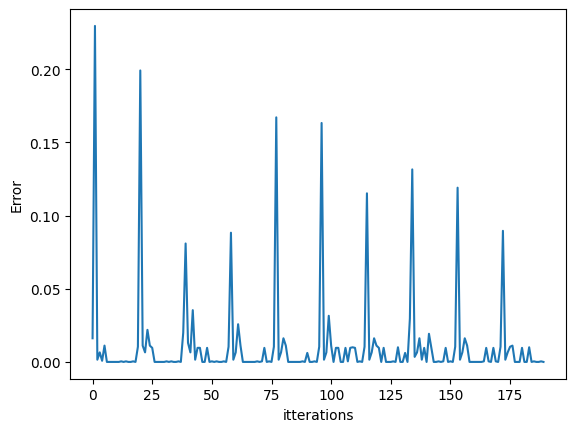

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def hidden_layer(v0_states, w, hb):
    v0_states_reshaped = tf.reshape(v0_states, [-1, visible_units])  # Assurez-vous que visible_units est correct
    h0_prob = tf.nn.sigmoid(tf.matmul(v0_states_reshaped, w) + hb)
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state


def reconstructed_output(h0_state, w, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(w)) + vb)
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]

def error(v0, v1):
    return tf.reduce_mean(tf.square(v0 - v1))

epochs = 10
batchsize = 500
errors = []
weights = []  # Correction : remplacer 500 par une liste vide []
k = 1
alpha = 0.1

visible_units = len(trX[0])
hidden_units = 128  # Ajustez cela selon vos besoins

# Initialiser les poids et les biais
w = tf.Variable(tf.random.normal([visible_units, hidden_units], 0.01), dtype=tf.float32)
vb = tf.Variable(tf.zeros([visible_units]), dtype=tf.float32)
hb = tf.Variable(tf.zeros([hidden_units]), dtype=tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices(np.float32(trX)).batch(batchsize)
j = 0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:
        j +=1
        for i_sample in range(len(batch_x)):
            v0_state = batch_x[i_sample]
            h0_state = hidden_layer(v0_state, w, hb)
            v1_state = reconstructed_output(h0_state, w, vb)
            h1_state = hidden_layer(v1_state, w, hb)

            delta_w = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)

            w = w + alpha * delta_w
            vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
            hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)

            if i_sample == len(batch_x) - 1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(w.numpy())

                print('itteration: %d' % (j),
                    'Epoch: %d' % (epoch + 1),
                      "batch #: %i" % batch_number,
                      "sample #: %i" % (i_sample + 1),
                      'reconstruction error: %f' % err)
            batch_number += 1

# Tracer les erreurs
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('itterations')
plt.show()




# Considérons un utilisateur fictif

In [ ]:
userid = 999

In [ ]:
inputUser = trX[userid-1].reshape(1, -1)
inputUser = tf.convert_to_tensor(trX[userid - 1], "float32")
v0 = inputUser # avec la note donnée à toutes les attractions qu'il a visité

print(v0)

tf.Tensor(
[0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ], shape=(104,), dtype=float32)


In [ ]:
#Nourrir l’utilisateur et reconstruire l’entrée

hh0 = tf.nn.sigmoid(tf.matmul([v0], w) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(w)) + vb)
rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor(
[1.6277303e-03 3.1226919e-05 1.5331808e-04 1.1713194e-05 3.5574300e-05
 1.6651356e-05 3.7846388e-05 7.2781491e-05 1.8337681e-05 4.5384837e-05
 5.4889815e-06 2.0697762e-05 1.9715037e-05 3.9668197e-05 3.8201561e-05
 1.7727491e-05 2.2504698e-04 1.1237349e-05 3.5534223e-04 3.0109080e-04
 4.9992803e-05 1.2477455e-04 1.3661271e-04 3.6252568e-05 4.6497451e-05
 2.0666530e-04 1.2836951e-07 4.7105499e-05 1.2021485e-05 1.0652716e-05
 1.3243268e-05 1.0439704e-04 8.4207531e-05 6.5595559e-05 6.9857109e-05
 1.5460928e-05 5.6452154e-05 6.0146040e-04 2.7412127e-04 5.7648904e-05
 3.5521851e-05 1.2053767e-05 4.7455065e-05 1.1816093e-03 8.4529420e-05
 2.6237016e-05 7.0488539e-05 9.7571363e-05 2.7777025e-04 2.3601298e-05
 3.1202837e-04 8.6155042e-06 3.1957781e-04 2.8339442e-05 3.0950010e-05
 2.2329582e-04 5.9316849e-06 3.6297606e-05 6.2235515e-05 6.2839372e-06
 3.7615744e-05 3.3830630e-04 2.1625119e-05 5.3874664e-05 3.3253782e-05
 2.6106060e-04 6.7378103e-04 1.5953449e-03 4.1963292e-05 5.0792914

# liste des attractions recommandées à l'utilisateur fictif

In [ ]:
attraction_score = attract[attract['attraction_id'].isin(user_rating_df.columns)]

In [ ]:
attraction_score = attraction_score.assign(recommandationScore = rec[0])
attraction_score.sort_values(['recommandationScore'], ascending=False).head(10)

,Unnamed: 0,attraction_id,country,province,city,lien_detail,image,category,nbre_review,address,name,rating,price,recommandationScore
103,103,103,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,104. Union Square Green Market,355,No Address Found,Flea & Street Markets,4.5,54.00,0.990130
101,101,101,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,102. The Lion King,9270,"{'lat': 40.75992584, 'lng': -73.98041534}",Theater & Performances,5.0,150.00,0.091785
100,100,100,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,101. Upper East Side,277,"{'lat': 40.77524948, 'lng': -73.94762421}",Neighborhoods,4.5,106.00,0.017963
102,102,102,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,103. Minskoff Theatre,284,"{'lat': 40.71304703, 'lng': -74.00723267}",Theaters,4.5,150.00,0.002908
94,94,94,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,95. GhostBusters Firestation,437,"{'lat': 40.70780182, 'lng': -74.01190186}",Points of Interest & Landmarks,4.0,61.00,0.002597
0,0,0,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,1. Central Park,134000,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Parks,4.5,200.00,0.001628
67,67,67,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,68. New-York Historical Society Museum & Library,854,"{'lat': 40.71304703, 'lng': -74.00723267}",Speciality Museums • Art Museums,4.5,149.00,0.001595
81,81,81,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,82. SeaGlass Carousel,2777,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks,4.0,34.99,0.001400
43,43,43,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,44. Washington Square Park,3658,"{'lat': 40.72782516, 'lng': -73.99477386}",Points of Interest & Landmarks • Parks,4.5,94.99,0.001182
74,74,74,United States,New York (NY),New York City,https://www.tripadvisor.com/Attraction_Review-...,['https://dynamic-media-cdn.tripadvisor.com/me...,75. Grand Central Market,784,"{'lat': 40.71304703, 'lng': -74.00723267}",Points of Interest & Landmarks • Flea & Street...,4.5,39.00,0.000828


In [23]:
def recomandation(userid, n):
  inputUser = trX[userid-1].reshape(1, -1)
  inputUser = tf.convert_to_tensor(trX[userid - 1], "float32")
  v0 = inputUser
  hh0 = tf.nn.sigmoid(tf.matmul([v0], w) + hb)
  vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(w)) + vb)
  rec = vv1
  attraction_score = attract[attract['attraction_id'].isin(user_rating_df.columns)]
  attraction_score = attraction_score.assign(recommandationScore = rec[0])
  return attraction_score.sort_values(['recommandationScore'], ascending=False)[:n]


In [24]:
recomandation(999, 15)[['attraction_id', 'recommandationScore']]

,attraction_id,recommandationScore
103,103,0.999904
98,98,0.009442
102,102,0.004702
42,42,0.003136
90,90,0.002894
88,88,0.002584
33,33,0.002290
100,100,0.001960
27,27,0.001868
93,93,0.000991


# item based


Le filtrage collaboratif basé sur les éléments est également appelé filtrage collaboratif élément-élément. Il s'agit d'un type d'algorithme de système de recommandation qui utilise la similarité des articles pour formuler des recommandations de produits.

Ici, nous parlerons de

- Qu’est-ce que le filtrage collaboratif basé sur les éléments (élément-élément) ?

- Comment créer une matrice utilisateur-produit ?

- Comment identifier des objets similaires ?

- Comment classer les éléments pour la recommandation ?